# Solutions Scripts

In [4]:
%matplotlib inline

### Exercise 10(c)

In [18]:
import numpy as np
from osgeo import gdal
from osgeo.gdalconst import GDT_Float32

m = 10
simimage = np.zeros((500**2,9))
for i in range(500**2):
    if i % 50000 == 0:
        print i
    X = np.mat(np.random.randn(m,3))
    Y = np.mat(np.random.randn(m,3))
    Wr = X.T*X + Y.T*Y
    Wi = X.T*Y - Y.T*X
    W = Wr - 1j*Wi
    simimage[i,0] = np.real(W[0,0])
    simimage[i,1] = np.real(W[0,1])
    simimage[i,2] = np.imag(W[0,1])
    simimage[i,3] = np.real(W[0,2])
    simimage[i,4] = np.imag(W[0,2])
    simimage[i,5] = np.real(W[1,1])
    simimage[i,6] = np.real(W[1,2])
    simimage[i,7] = np.imag(W[1,2])
    simimage[i,8] = np.real(W[2,2])
driver = gdal.GetDriverByName('GTiff')    
outDataset = driver.Create('myimagery/enlsim.tif',500,500,9,GDT_Float32) 
for i in range(9):
    outBand = outDataset.GetRasterBand(i+1)
    outBand.WriteArray(np.reshape(simimage[:,i],(500,500)),0,0) 
    outBand.FlushCache()  
outDataset = None    
print 'Done'      

0
50000
100000
150000
200000
Done


     ENL Estimation
Tue Oct 23 14:01:38 2018
infile:  myimagery/enlsim.tif
Quad polarimetry
filtering...
row:  100  200  300  400 

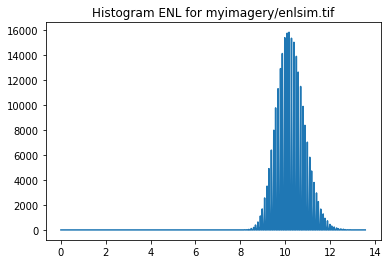

 ENL image written to: myimagery/enlsim_enl.tif
elapsed time: 25.6328527927


In [19]:
run scripts/enlml myimagery/enlsim.tif

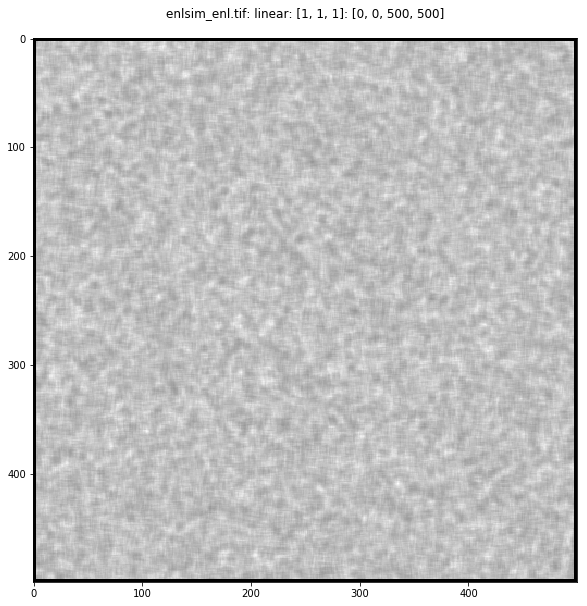

In [20]:
run scripts/dispms -f myimagery/enlsim_enl.tif -e 2